In [4]:
#importing my packages 
import patatmo
import pandas
import time
import os
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [38]:
#loading in the file I use for my correlations (contains the temperature and UHI values)
data_cleaned1 = pd.read_csv('datacleaned2019uhidaily.csv',index_col='time',parse_dates=['time'] )

In [39]:
#resampling it to daily averages and grouping it per station id
data_cleaned_grp1 = data_cleaned1.groupby('station_id').resample('D').mean()
data_cleaned_grp_grp1 = data_cleaned_grp1.reset_index().groupby('station_id')

In [10]:
#loading in the air pollution data of bleriotlaan
data_bleriotlaan = pd.read_csv('bleriotlaan_data.csv',index_col='time',parse_dates=['time'] )

In [41]:
#extracting the data of the Netatmo station which I use for the correlation test for the Bleriotlaan
bleriotlaan = data_cleaned_grp_grp1.get_group('70:ee:50:1c:7b:80')
bleriotlaan

,station_id,time,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Temperature,Humidity,latitude,longitude,year,month,day,uhimeandaily
10220,70:ee:50:1c:7b:80,2019-01-01 00:00:00+00:00,10220,11718454.0,286.0,8.086891,84.719101,52.039369,4.366319,2019.0,1.0,1.0,0.410683
10221,70:ee:50:1c:7b:80,2019-01-02 00:00:00+00:00,10221,11718719.0,551.0,6.134601,80.570342,52.039369,4.366319,2019.0,1.0,2.0,0.337092
10222,70:ee:50:1c:7b:80,2019-01-03 00:00:00+00:00,10222,11718984.0,816.0,4.575281,94.689139,52.039369,4.366319,2019.0,1.0,3.0,1.497762
10223,70:ee:50:1c:7b:80,2019-01-04 00:00:00+00:00,10223,11719263.5,1095.5,5.765068,88.534247,52.039369,4.366319,2019.0,1.0,4.0,0.467818
10224,70:ee:50:1c:7b:80,2019-01-05 00:00:00+00:00,10224,11719552.5,1384.5,7.327622,88.926573,52.039369,4.366319,2019.0,1.0,5.0,0.286219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,70:ee:50:1c:7b:80,2019-12-27 00:00:00+00:00,10580,11823004.0,104836.0,4.048772,98.796491,52.039369,4.366319,2019.0,12.0,27.0,-0.335144
10581,70:ee:50:1c:7b:80,2019-12-28 00:00:00+00:00,10581,11823290.0,105122.0,1.987108,99.031359,52.039369,4.366319,2019.0,12.0,28.0,-0.206459
10582,70:ee:50:1c:7b:80,2019-12-29 00:00:00+00:00,10582,11823583.5,105415.5,2.445333,93.510000,52.039369,4.366319,2019.0,12.0,29.0,0.206399
10583,70:ee:50:1c:7b:80,2019-12-30 00:00:00+00:00,10583,11823877.5,105709.5,4.401389,83.121528,52.039369,4.366319,2019.0,12.0,30.0,-0.202484


In [15]:
#dropping the columns that do not matter for this analysis 
bleriotlaan = bleriotlaan.drop(['time','station_id', 'Unnamed: 0', 'Humidity', 'latitude', 'longitude', 'year', 'month', 'day'], axis=1)

In [16]:
#creating a list with the temperatures of the Netatmo station
Temperatuur = []
for i in bleriotlaan.Temperature:
    value = i
    print(value)
    Temperatuur.append(value)
    
print(len(Temperatuur))

8.086891385767785
6.134600760456275
4.575280898876404
5.765068493150699
7.327622377622379
6.787279151943446
7.948000000000002
7.442013888888888
5.101045296167254
4.116666666666666
7.588000000000009
7.9790940766550555
8.791637630662043
5.860000000000006
6.963541666666666
6.48118466898955
3.893055555555558
0.3607973421926909
-0.63951048951049
-2.4250000000000007
-1.283999999999999
-0.10975609756097528
-0.16620209059233435
0.6393728222996515
2.600666666666669
7.665277777777778
5.877121771217701
4.3166112956810645
1.7878048780487814
1.3048611111111108
-0.08263888888888883
1.253666666666666
3.1319444444444486
2.4968749999999975
2.227986348122869
4.6241379310344835
5.453819444444438
7.551916376306627
7.857333333333333
8.177351916376303
6.221874999999994
5.248958333333335
5.231666666666665
6.636585365853659
5.126989619377161
5.398999999999999
6.9714285714285715
6.9362369337979075
7.5487889273356386
7.354180602006692
7.54912891986062
8.063541666666664
9.581333333333335
7.3766550522648044
6.041

In [44]:
#creating a list with the UHI values 
UHI = []
for i in bleriotlaan.uhimeandaily:
    value = i
    print(value)
    UHI.append(value)
    
print(len(UHI))

0.4106832073291198
0.3370918636591229
1.4977615190314428
0.4678176340441658
0.28621886885045456
0.5683980330623228
0.4532631578947424
0.2958600427350442
0.11188445700641304
0.6761072261072258
0.3749565217391417
0.3651567944250971
0.16086839989278798
0.2914685314685377
0.1793665824915731
0.22733851514339154
0.3951388888888947
-0.36647538508003663
-0.4804195804195808
-0.4281468531468545
-0.45768421052631497
0.3509105691056913
0.4463853219950795
0.378320190720704
0.32274024526198675
0.2824707602339247
0.1513377990922713
0.17954835861812946
-0.5623634721195694
0.3880778943278945
0.443862877895564
0.3824385964912264
0.5690681902638466
-0.011896929824562363
-0.005929735793215318
0.24097294786950216
0.2345886752136641
-0.19089064123723176
-0.0805614035087645
-0.19941576039138376
0.15836622807017076
0.4447625291375337
-0.6206981981981983
0.3274625588361184
-0.9416514956054184
-2.166845070422534
-0.4363155363155373
-1.530196632635656
-0.905597037576638
-0.03538168755560278
-0.1847871640554608
-

In [68]:
#adding the two lists, created in the 2 lines above, to the air pollution dataframe 
data_bleriotlaan['Temperatuur'] = Temperatuur
data_bleriotlaan['UHImeandaily'] = UHI

In [46]:
#changing the types of the variables, so we can use them for correlation tests
data_bleriotlaan1 = data_bleriotlaan.apply(pd.to_numeric, errors='coerce')
data_bleriotlaan1.dtypes

 pm10           float64
 o3             float64
 no2            float64
Temperatuur     float64
UHImeandaily    float64
dtype: object

In [47]:
#executing the Pearson's correlation between the variables 
data_bleriotlaan1.corr(method = 'pearson')

,pm10,o3,no2,Temperatuur,UHImeandaily
pm10,1.000000,0.115448,0.187000,-0.080637,-0.282667
o3,0.115448,1.000000,-0.391253,0.588929,0.350827
no2,0.187000,-0.391253,1.000000,-0.456337,-0.276469
Temperatuur,-0.080637,0.588929,-0.456337,1.000000,0.435993
UHImeandaily,-0.282667,0.350827,-0.276469,0.435993,1.000000


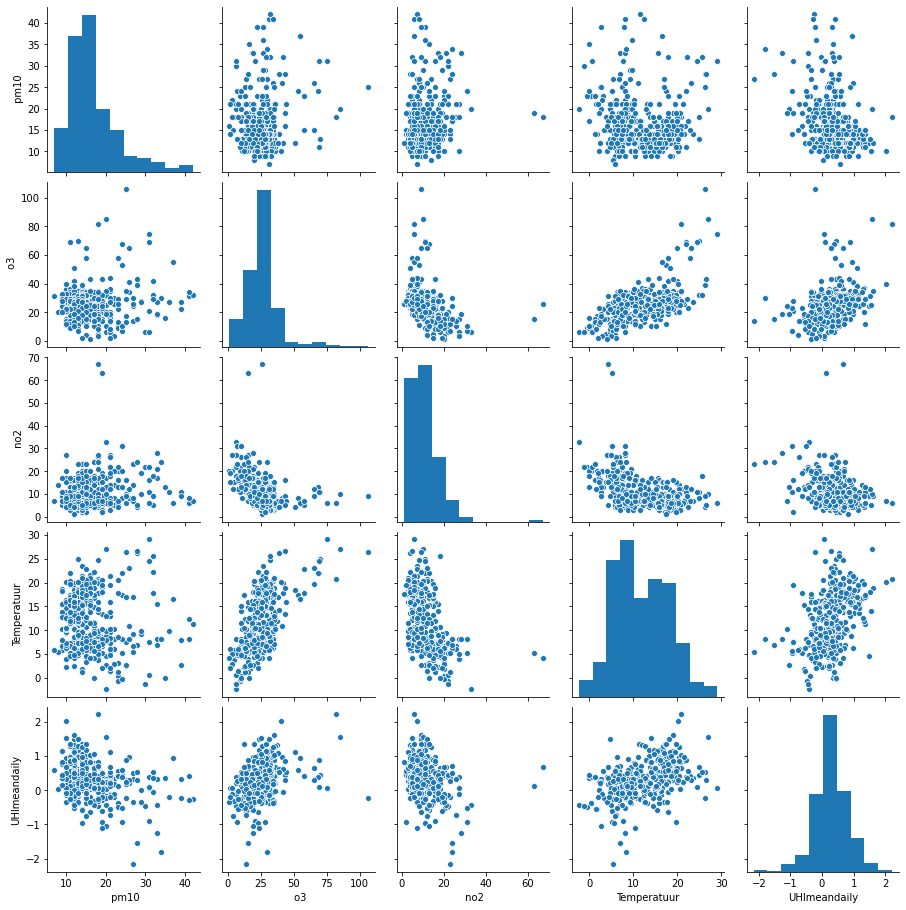

In [48]:
sns.pairplot(data_bleriotlaan1)

In [49]:
amsterdamse_veerkade = pd.read_csv('amsterdamse_veerkade.csv',index_col='time',parse_dates=['time'] )
print(len(amsterdamse_veerkade))

365


In [50]:
amsterdamseveer = data_cleaned_grp_grp1.get_group('70:ee:50:03:bd:3e')
amsterdamseveer

,station_id,time,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Temperature,Humidity,latitude,longitude,year,month,day,uhimeandaily
4015,70:ee:50:03:bd:3e,2019-01-01 00:00:00+00:00,4015,3926941.0,294.0,7.484698,100.000000,52.081973,4.293458,2019.0,1.0,1.0,-0.191511
4016,70:ee:50:03:bd:3e,2019-01-02 00:00:00+00:00,4016,3927223.5,576.5,5.626761,99.936620,52.081973,4.293458,2019.0,1.0,2.0,-0.170748
4017,70:ee:50:03:bd:3e,2019-01-03 00:00:00+00:00,4017,3927503.0,856.0,4.239636,99.185455,52.081973,4.293458,2019.0,1.0,3.0,1.162117
4018,70:ee:50:03:bd:3e,2019-01-04 00:00:00+00:00,4018,3927789.0,1142.0,5.287205,99.292929,52.081973,4.293458,2019.0,1.0,4.0,-0.010045
4019,70:ee:50:03:bd:3e,2019-01-05 00:00:00+00:00,4019,3928081.5,1434.5,7.011111,99.861111,52.081973,4.293458,2019.0,1.0,5.0,-0.030292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,70:ee:50:03:bd:3e,2019-12-27 00:00:00+00:00,4375,4031687.0,105040.0,4.724913,98.103806,52.081973,4.293458,2019.0,12.0,27.0,0.340997
4376,70:ee:50:03:bd:3e,2019-12-28 00:00:00+00:00,4376,4031983.0,105336.0,3.243894,99.508251,52.081973,4.293458,2019.0,12.0,28.0,1.050327
4377,70:ee:50:03:bd:3e,2019-12-29 00:00:00+00:00,4377,4032282.0,105635.0,3.444068,93.508475,52.081973,4.293458,2019.0,12.0,29.0,1.205133
4378,70:ee:50:03:bd:3e,2019-12-30 00:00:00+00:00,4378,4032525.5,105878.5,4.714062,82.286458,52.081973,4.293458,2019.0,12.0,30.0,0.110189


In [51]:
amsterdamseveer = amsterdamseveer.drop(['time','station_id', 'Unnamed: 0', 'Humidity', 'latitude', 'longitude', 'year', 'month', 'day'], axis=1)

In [52]:
Temperatuur1 = []
for i in amsterdamseveer.Temperature:
    value = i
    print(value)
    Temperatuur1.append(value)
    
print(len(Temperatuur1))

7.4846975088968
5.626760563380285
4.239636363636359
5.287205387205385
7.011111111111113
6.529310344827577
7.743000000000008
6.339583333333333
4.142906574394471
4.216376306620208
7.39866666666666
7.390657439446358
7.985467128027684
4.996688741721856
6.921951219512197
6.3200692041522455
3.4839721254355376
1.4294701986754972
0.03275261324041818
-1.2284722222222224
0.2827242524916934
-0.14808362369337966
0.07395833333333329
0.7266435986159169
2.4176666666666664
7.211805555555551
5.657241379310345
3.89003322259136
2.2034843205574925
1.3855172413793109
-0.12857142857142845
1.014381270903011
3.325517241379314
2.840484429065741
2.075747508305647
4.879861111111109
5.453979238754322
7.174216027874563
7.37692307692307
7.939583333333338
6.145454545454545
4.285333333333334
6.273519163763059
6.982291666666662
6.857093425605536
8.462126245847184
8.893771626297573
9.438194444444443
9.998675496688753
7.9913494809688626
8.320069204152244
8.20972222222222
9.257333333333333
8.835069444444443
8.84089347079

In [53]:
UHI1 = []
for i in amsterdamseveer.uhimeandaily:
    value = i
    print(value)
    UHI1.append(value)
    
print(len(UHI1))

-0.1915106695418656
-0.170748333416868
1.1621169837913992
-0.010045471901148241
-0.030292397660811158
0.3104292259464545
0.2482631578947485
-0.8065705128205112
-0.8462542647663716
0.7758168660607674
0.18562318840579284
-0.2232798427836009
-0.64530210274157
-0.5718427268096118
0.13777613533710298
0.06622305030608723
-0.013944541231125651
0.7021974714027697
0.19184352233132745
0.7683809246309237
1.1090400419653772
0.312583042973287
0.6865457459207471
0.4655909670369693
0.13974024526198425
-0.17100146198830224
-0.0685425928150849
-0.24702971447157476
-0.14668402961085825
0.4687340245960947
0.3979303382130244
0.14315320072757098
0.7626409871987119
0.3317124992411813
-0.1581685756104374
0.4966961279461266
0.23474846952354864
-0.5685909896692971
-0.5609716599190273
-0.4371843434343488
0.08194577352472178
-0.5188624708624676
0.4211542988981973
0.673168859649123
0.7884523106229553
0.8962811754246509
1.4860275185534642
0.9717608780108816
1.5442895317764762
0.6017871914065678
0.5861531202361627


In [54]:
amsterdamse_veerkade['Temperatuur'] = Temperatuur1
amsterdamse_veerkade['UHImeandaily'] = UHI1

In [55]:
amsterdamse_veerkade1 = amsterdamse_veerkade.apply(pd.to_numeric, errors='coerce')
amsterdamse_veerkade1.dtypes

 pm10           float64
 o3             float64
 no2            float64
Temperatuur     float64
UHImeandaily    float64
dtype: object

In [56]:
amsterdamse_veerkade1.corr(method = 'pearson')

,pm10,o3,no2,Temperatuur,UHImeandaily
pm10,1.000000,-0.064917,0.233114,-0.127752,-0.001136
o3,-0.064917,1.000000,-0.345948,0.646008,0.361089
no2,0.233114,-0.345948,1.000000,-0.331018,0.031766
Temperatuur,-0.127752,0.646008,-0.331018,1.000000,0.567575
UHImeandaily,-0.001136,0.361089,0.031766,0.567575,1.000000


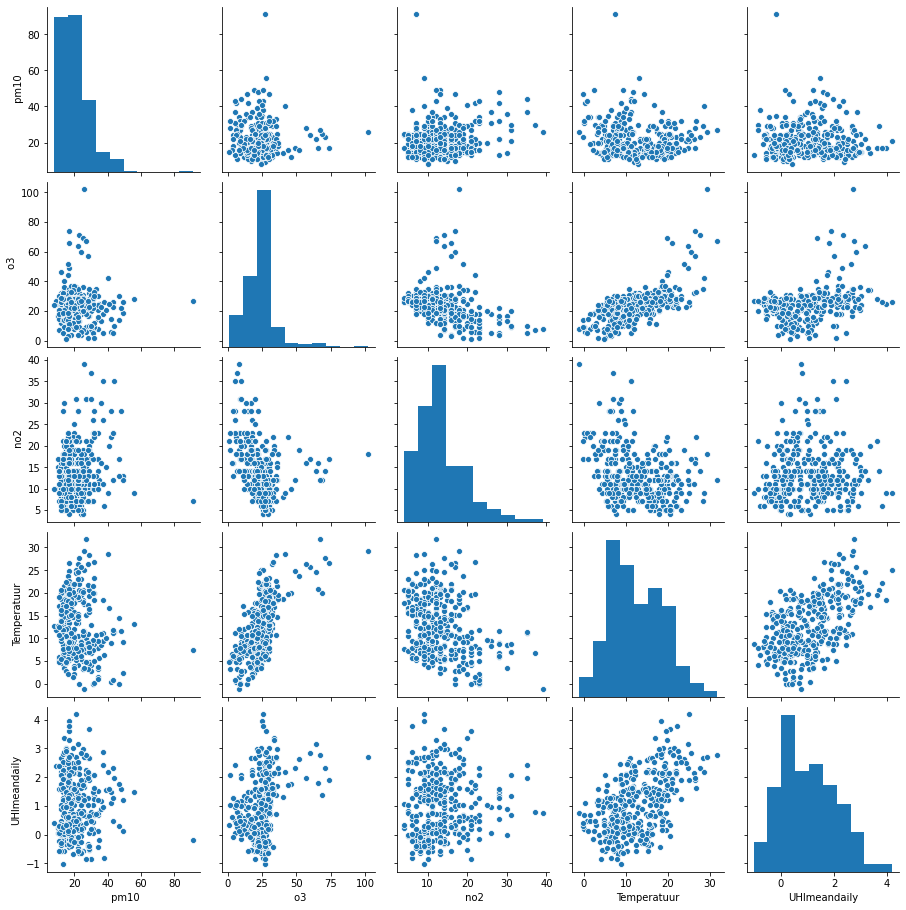

In [57]:
sns.pairplot(amsterdamse_veerkade1)

In [58]:
rebecquestraat = pd.read_csv('rebecquestraat.csv',index_col='time',parse_dates=['time'] )
print(len(rebecquestraat))

365


In [59]:
rebecque = data_cleaned_grp_grp1.get_group('70:ee:50:12:4d:42')
rebecque

,station_id,time,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Temperature,Humidity,latitude,longitude,year,month,day,uhimeandaily
5840,70:ee:50:12:4d:42,2019-01-01 00:00:00+00:00,5840,7071198.0,290.0,8.167528,84.538745,52.081968,4.293328,2019.0,1.0,1.0,0.491319
5841,70:ee:50:12:4d:42,2019-01-02 00:00:00+00:00,5841,7071476.0,568.0,6.607368,74.870175,52.081968,4.293328,2019.0,1.0,2.0,0.809860
5842,70:ee:50:12:4d:42,2019-01-03 00:00:00+00:00,5842,7071757.5,849.5,5.415827,87.305755,52.081968,4.293328,2019.0,1.0,3.0,2.338308
5843,70:ee:50:12:4d:42,2019-01-04 00:00:00+00:00,5843,7072044.0,1136.0,6.115593,85.928814,52.081968,4.293328,2019.0,1.0,4.0,0.818342
5844,70:ee:50:12:4d:42,2019-01-05 00:00:00+00:00,5844,7072334.0,1426.0,7.500351,86.828070,52.081968,4.293328,2019.0,1.0,5.0,0.458947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,70:ee:50:12:4d:42,2019-12-27 00:00:00+00:00,6200,7174510.5,103602.5,5.080986,92.172535,52.081968,4.293328,2019.0,12.0,27.0,0.697070
6201,70:ee:50:12:4d:42,2019-12-28 00:00:00+00:00,6201,7174794.0,103886.0,3.495406,91.851590,52.081968,4.293328,2019.0,12.0,28.0,1.301839
6202,70:ee:50:12:4d:42,2019-12-29 00:00:00+00:00,6202,7175077.5,104169.5,3.743662,88.232394,52.081968,4.293328,2019.0,12.0,29.0,1.504728
6203,70:ee:50:12:4d:42,2019-12-30 00:00:00+00:00,6203,7175368.5,104460.5,5.899329,76.939597,52.081968,4.293328,2019.0,12.0,30.0,1.295456


In [60]:
rebecque = rebecque.drop(['time','station_id', 'Unnamed: 0', 'Humidity', 'latitude', 'longitude', 'year', 'month', 'day'], axis=1)

In [61]:
Temperatuur2 = []
for i in rebecque.Temperature:
    value = i
    print(value)
    Temperatuur2.append(value)
    
print(len(Temperatuur2))

8.16752767527676
6.607368421052628
5.4158273381295015
6.1155932203389725
7.500350877192978
7.14020979020979
8.177076411960138
7.6752650176678445
5.6901754385964916
4.8230769230769255
7.1404255319148895
8.036789297658865
8.74158075601374
6.437062937062935
7.736470588235312
6.7297202797202775
4.915331010452968
2.6222614840989382
0.6249158249158248
-0.285314685314685
1.12902097902098
0.3587248322147653
0.16385964912280682
1.3531468531468531
2.97167832167832
7.725838926174508
6.243835616438355
4.950347222222224
3.264333333333333
1.9370629370629373
0.4989510489510478
1.3671328671328686
3.770707070707077
4.035664335664337
2.8416083916083865
5.072053872053869
5.79895470383276
8.041034482758613
8.261188811188793
8.552786885245908
6.477351916376308
5.977003484320557
6.8287671232876725
7.397602739726027
7.368531468531464
8.99684210526316
9.33796610169492
10.537959183673463
9.460489510489497
7.713240418118465
8.330201342281894
8.460139860139861
8.886315789473684
9.085234899328864
8.73999999999999

In [62]:
UHI2 = []
for i in rebecque.uhimeandaily:
    value = i
    print(value)
    UHI2.append(value)
    
print(len(UHI2))

0.491319496838095
0.8098595242554758
2.33830795828454
0.8183423612324391
0.458947368421053
0.9213286713286656
0.6823395698548786
0.5291111715140016
0.7010145994356511
1.382517482517486
-0.07261794634597685
0.4228520154289068
0.11081152524448434
0.8685314685314669
0.952295504060218
0.4758741258741193
1.4174143437863058
1.8949887568262107
0.784006734006734
1.7115384615384608
1.955336768494664
0.8193914988814319
0.7764470617102207
1.0920942215679057
0.6937519002736372
0.3430319086306559
0.5180516443129255
0.8132842851592885
0.9141649831649828
1.0202797202797214
1.0254528157355003
0.495904796957429
1.2078308165264744
1.526892405839776
0.6076923076923024
0.6888888888888864
0.5797239346019865
0.2982274652147545
0.3232940743466957
0.1760192084782215
0.41384314444648573
1.1728076801247562
0.9764022584228096
1.0884799327084869
1.2998903535488848
1.4309970348406296
1.93022199395081
2.0715256172398995
1.0061035455772205
0.3236781285561703
0.5962852583658131
0.297202797202802
-0.32877192982455306


In [63]:
rebecquestraat['Temperatuur'] = Temperatuur2
rebecquestraat['UHImeandaily'] = UHI2

In [64]:
rebecquestraat1 = rebecquestraat.apply(pd.to_numeric, errors='coerce')
rebecquestraat1.dtypes

 pm25           float64
 pm10           float64
 o3             float64
 no2            float64
Temperatuur     float64
UHImeandaily    float64
dtype: object

In [65]:
# rebecquestraat.convert_objects(convert_numeric = True)
rebecquestraat1.corr(method = 'pearson')

,pm25,pm10,o3,no2,Temperatuur,UHImeandaily
pm25,1.000000,0.565722,-0.188166,0.406961,-0.308905,0.106423
pm10,0.565722,1.000000,-0.122084,0.512767,-0.258614,0.176996
o3,-0.188166,-0.122084,1.000000,-0.455877,0.646402,0.037034
no2,0.406961,0.512767,-0.455877,1.000000,-0.406403,0.292696
Temperatuur,-0.308905,-0.258614,0.646402,-0.406403,1.000000,-0.025321
UHImeandaily,0.106423,0.176996,0.037034,0.292696,-0.025321,1.000000


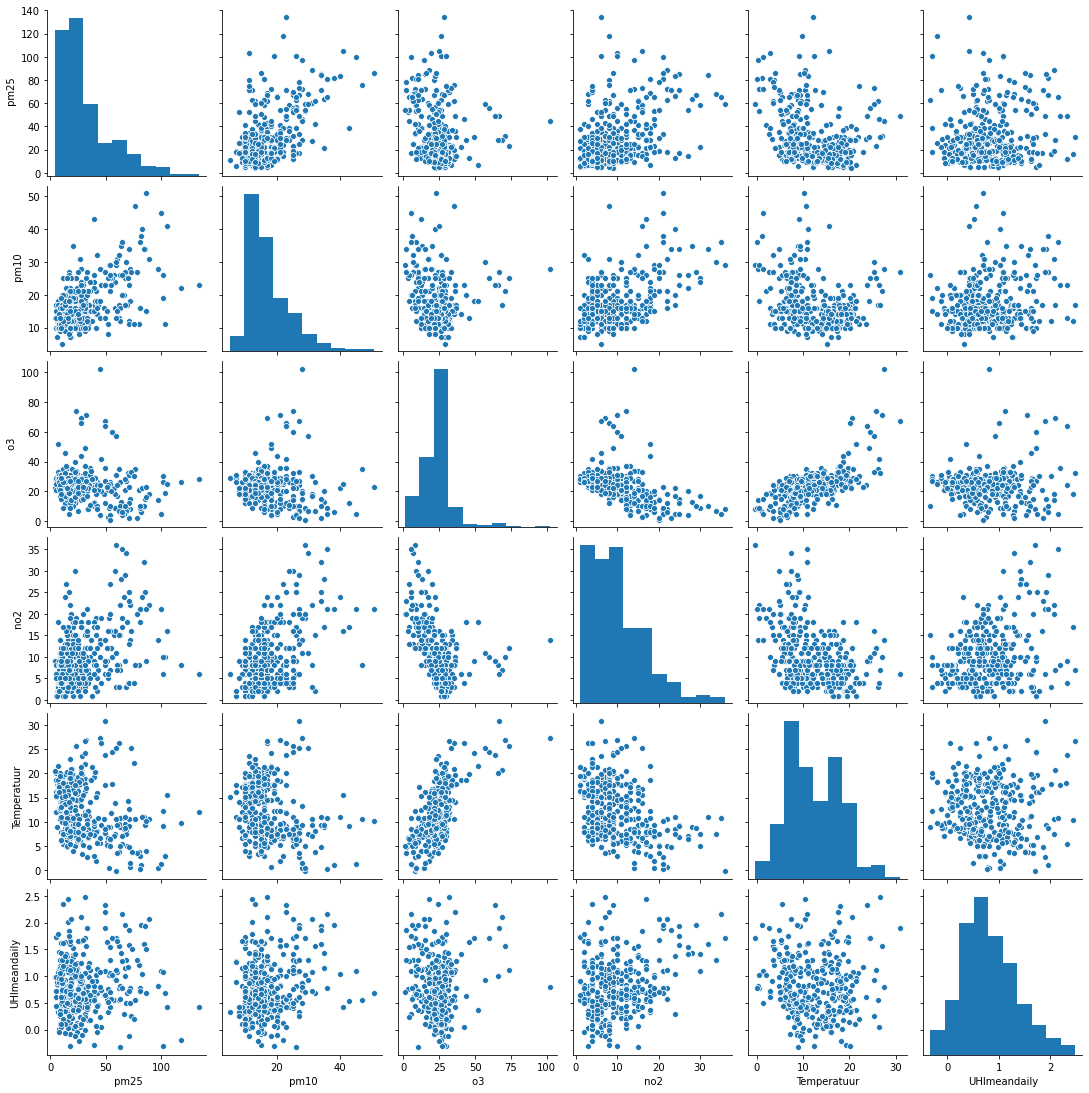

In [66]:
sns.pairplot(rebecquestraat1)